In [ ]:
! lamin load scdataloader

💡 found cached instance metadata: /home/ml4ig1/.lamin/instance--jkobject--scprint.env
💡 loaded instance: jkobject/scprint


## preprocess

In [5]:
adata = ln.Artifact.filter(version='2', description="preprocessed by scDataLoader").first().lo()

In [8]:
adata = adata.

AnnDataAccessor object with n_obs × n_vars = 23349 × 70116
  constructed for the AnnData object Mgilie8RUip2slEl4RBk.h5ad
    layers: ['clean']
    obs: ['_index', 'assay', 'assay_ontology_term_id', 'cell_culture', 'cell_cycle_score', 'cell_type', 'cell_type_ontology_term_id', 'cluster_id', 'development_stage', 'development_stage_ontology_term_id', 'disease', 'disease_ontology_term_id', 'dissection', 'donor_id', 'dpt_group', 'fraction_mitochondrial', 'fraction_unspliced', 'heat_diff', 'is_primary_data', 'leiden_1', 'leiden_2', 'leiden_3', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'log1p_total_counts_hb', 'log1p_total_counts_mt', 'log1p_total_counts_ribo', 'mt_outlier', 'n_genes_by_counts', 'nnz', 'organism', 'organism_ontology_term_id', 'outlier', 'pct_counts_hb', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'roi', 'sample_id', 'self_reported_ethnicity', 'self_reported_ethnicity_ontology_term_id', 'sex', 'sex_ontology_term_id', 'subcluster_id', 'supercluster

In [13]:
sc.pl.scatter(adata, basis="diffmap", color=['cell_type_ontology_term_id', 'heat_diff'], components)

AttributeError: 'AnnDataAccessor' object has no attribute '_sanitize'

## assessing unseen genes

In [2]:
! lamin load scdataloader

💡 found cached instance metadata: /home/ml4ig1/.lamin/instance--jkobject--scdataloader.env
💡 loaded instance: jkobject/scdataloader
💡 loaded instance: jkobject/scdataloader


In [10]:
from scdataloader import DataModule

import bionty as bt
import lamindb as ln
import lnschema_bionty as lb

from scdataloader.utils import get_ancestry_mapping, load_genes

import scanpy as sc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

  %reload_ext autoreload


In [3]:
# TODO: drop tissue & dev stage until part or is taken in account

hierarchical_labels = [
    "cell_type_ontology_term_id", #1
    # "tissue_ontology_term_id",
    "disease_ontology_term_id", # 2
#    "development_stage_ontology_term_id",
    "assay_ontology_term_id", #3
    'self_reported_ethnicity_ontology_term_id', #4
]
labels_to_pred = hierarchical_labels+[
    'sex_ontology_term_id', #5
    "organism_ontology_term_id", #6
]
all_labels = labels_to_pred+[
    #'dataset_id',
    'cell_culture',
    "heat_diff",
    "total_counts",
    "nnz",
    "dpt_group",
]

gene_emb = '../data/temp/embeddings.parquet'
d_model=128

In [ ]:
# we might want not to order the genes by expression (or do it?)
# we might want to not introduce zeros and 

In [4]:
datamodule = DataModule(
    collection_name="preprocessed dataset",
    #gene_embeddings=gene_emb,
    all_labels=all_labels,
    hierarchical_labels=hierarchical_labels,
    organisms=["NCBITaxon:9606"],
    how="most expr",
    max_len=1000,
    add_zero_genes=100,
    label_to_weight=labels_to_pred,
    label_to_pred=labels_to_pred,
    batch_size=8,
    num_workers=1,
    validation_split=0.1,
    test_split=0.1)
testfiles = datamodule.setup()

won't do any check but we recommend to have your dataset coming from local storage


0.0% are aligned
total dataset size is 106.584138411 Gb
---
dataset contains:
     5567614 cells
     70116 genes
     11 labels
     1 organisms
dataset contains 230 classes to predict

downloading gene names from biomart

total dataset size is 106.584138411 Gb
---
dataset contains:
     5567614 cells
     70116 genes
     11 labels
     1 organisms
dataset contains 230 classes to predict

downloading gene names from biomart
['ensembl_gene_id', 'hgnc_symbol', 'gene_biotype', 'entrezgene_id', 'start_position', 'chromosome_name']
reduced the size to 0.6722574020195106
these files will be considered test datasets:
    /home/ml4ig1/scprint/.lamindb/BljRloq1xjcxRNDpejzI.h5ad
perc test:  0.00226129182087695


## checking neighbors

## conversion of parental relationships

In [ ]:
df = bt.Tissue.filter().df()

In [ ]:
parentdf = bt.Tissue.filter().df(include=["parents__ontology_id"]).set_index("ontology_id")

In [ ]:
ids

ontology_id
UBERON:8440012    [UBERON:0009663]
Name: parents__ontology_id, dtype: object

In [6]:
bt.Tissue.public().to_pronto().to_df(include_rel="part_of")

,name,definition,synonyms,parents
ontology_id,,,,
BFO:0000001,entity,None,None,[]
BFO:0000002,continuant,An Entity That Exists In Full At Any Time In W...,None,[BFO:0000001]
BFO:0000003,occurrent,An Entity That Has Temporal Parts And That Hap...,None,[BFO:0000001]
BFO:0000004,independent continuant,B Is An Independent Continuant = Def. B Is A C...,None,[BFO:0000002]
BFO:0000006,spatial region,None,None,[BFO:0000141]
...,...,...,...,...
CL:1001569,hippocampal interneuron,An Interneuron With A Soma Found In The Hippoc...,None,"[CL:0008031, CL:0002608]"
CL:1001571,hippocampal pyramidal neuron,A Pyramidal Neuron With A Soma Found In The Hi...,None,"[CL:4023111, UBERON:0004121, CL:0002608, UBERO..."
CL:1001572,colon endothelial cell,A Vascular Endothelial Cell Found In Colon Blo...,None,"[CL:0000115, CL:0011108, UBERON:0000077, UBERO..."


In [61]:
_.loc["UBERON:0002308"]

name                                     nucleus of brain
definition    A Neural Nucleus That Is Part Of The Brain.
synonyms                                    brain nucleus
parents                                  [UBERON:0000125]
Name: UBERON:0002308, dtype: object

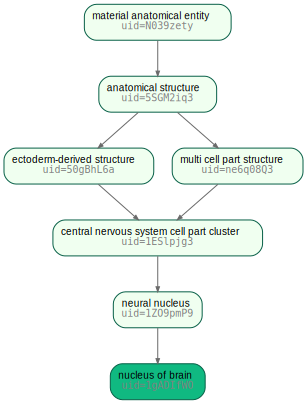

In [ ]:
bt.Tissue.search("nucleus of brain", field="name",return_queryset=True).first().view_parents()

AttributeError: 'Tissue' object has no attribute 'ontology'

In [11]:
obj = bt.Tissue.public().to_pronto()

In [33]:
df.parents = df.parents.astype(str)

In [34]:
df[df.parents.str.contains('UBERON:0000125')]

,name,definition,synonyms,parents
ontology_id,,,,
UBERON:0001883,olfactory tubercle,"Region In The Ventral Telencephalon, Prominent...",tuberculum olfactorium,"['UBERON:0009663', 'UBERON:0000125']"
UBERON:0002308,nucleus of brain,A Neural Nucleus That Is Part Of The Brain.,brain nucleus,['UBERON:0000125']
UBERON:0002736,lateral nuclear group of thalamus,The Lateral Nuclear Group Is A Collection Of N...,lateral nucleus of thalamus|lateral nuclear gr...,"['UBERON:0015233', 'UBERON:0000125']"
UBERON:0007414,nucleus of midbrain tegmentum,A Nucleus Of Brain That Spans A Midbrain Tegme...,tegmental nuclei|tegmental nucleus,['UBERON:0000125']
UBERON:0009918,retrotrapezoid nucleus,The Loose Collection Of Neurons That Reside In...,None,"['UBERON:0007635', 'UBERON:0000125']"
UBERON:0011777,nucleus of spinal cord,A Neural Nucleus That Is Part Of The Spinal Cord.,spinal cord nucleus,['UBERON:0000125']
UBERON:0035145,nucleus sacci vasculosi,None,None,['UBERON:0000125']
UBERON:0035808,robust nucleus of arcopallium,A Specialized Nucleus Within The Intermediate ...,None,"['UBERON:0009663', 'UBERON:0000125']"
UBERON:0035973,nucleus incertus,Distinct Cell Group In Caudoventral Regions Of...,None,"['UBERON:0006331', 'UBERON:0009662', 'UBERON:0..."


In [21]:
df = obj.to_df()
df[df['name']=="nucleus of brain"]

,name,definition,synonyms,parents
ontology_id,,,,
UBERON:0002308,nucleus of brain,A Neural Nucleus That Is Part Of The Brain.,brain nucleus,[UBERON:0000125]


In [ ]:
groupings, _, lclass = get_ancestry_mapping(cats, parentdf)

In [ ]:
['spinal cord', 'vermiform appendix', 'kidney', 'blood', 'caudal ganglionic eminence', 'skin of body', 'mesenteric lymph node', 'hippocampal formation', 'heart', 'uterine cervix', 'coronal suture', 'eye', 'meningeal dura mater', 'descending colon', 'fovea centralis', 'temporal lobe', 'unknown', 'ascending colon', 'jejunum', 'thyroid gland', 'lamina propria', 'mesonephros', 'venous blood', 'jejunal epithelium', 'cerebral cortex', 'chorionic villus', 'primary motor cortex', 'lung', 'muscle organ', 'thalamic complex', 'cortex of kidney', 'peripheral region of retina', 'bronchopulmonary lymph node', 'thymus', 'lung parenchyma', 'skeletal muscle tissue', 'prostate gland', 'brain meninx', 'esophagus', 'dura mater', 'ileal epithelium', 'ureter', 'fallopian tube', 'spleen', 'breast', 'entorhinal cortex', 'liver', 'primary visual cortex', 'adipose tissue', 'gonad', 'stomach', 'rib', 'caecum', 'pancreas', 'anterior cingulate cortex', 'bladder organ', 'retina', 'small intestine', 'vault of skull', 'duodenum', 'heart left ventricle', 'artery', 'adrenal gland', 'alveolus of lung', 'bone marrow', 'uterus', 'peripheral lymph node', 'renal medulla', 'intestine', 'myelencephalon', 'islet of Langerhans', 'gallbladder', 'lamina propria of small intestine', 'brain', 'zone of skin', 'trachea', 'respiratory airway', 'renal papilla', 'orbitofrontal cortex', 'hypothalamus', 'sigmoid colon', 'placenta', 'ileum', 'medial ganglionic eminence', 'umbilical cord blood', 'ovary', 'pleura', 'transverse colon', 'subdural space', 'rectum', 'lower lobe of left lung', 'cerebellum', 'thoracic lymph node', 'cerebral nuclei', 'parietal lobe', 'omentum', 'testis']
